In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy import special
import pandas as pd

In [77]:
def lambda_2(vector):

    sum_i=np.zeros(vector.size,dtype=float)

    diff=np.zeros(vector.size,dtype=float)
    for i in range(vector.size-2):
        #print('Start i sum_i',sum_i)
        #print('i:',i)
        #print('vector[i]',vector[i])
        diff=np.zeros(vector.size,dtype=float)
    
        for j in range(i+1,vector.size):
            #print('j',j)
            #print('seed[j]',vector[j])
            diff[j-1]=abs(vector[i]-vector[j])
            #print('diff',diff)
        
        sum_i[i] = np.sum(diff)
        #print('End j sum_i',sum_i)
    
    #print(sum_i)
    
    lambda_vec = np.math.factorial(vector.size-2)/np.math.factorial(vector.size)*np.sum(sum_i)

    #print('vector:', vector)
    #print('Lambda 2 Hoskins 1990 for this vector:',lambda_vec)

    return lambda_vec


In [78]:
# Example 5.9 Two-Sample Permutation Test for a Complicated Sample Statistic

# Table 5.5
# Dispersion by L-scale (Hosking 1990)
# lambda_2 = (n1-2)!/n1! Sum(i..n1-1) Sum(j=i+1..n1) |xi-xj|
#  Seeded & Unseeded from Table 5.5

seed = np.array([49,4,18,26,29,9,16,12,2,22,10,34])
unseed = np.array([61,33,62,45,0,30,82,10,20,358,63])

lambda_2_seed=lambda_2(seed)
lambda_2_unseed=lambda_2(unseed)

print('Seed:',lambda_2_seed)
print('Unseed:',lambda_2_unseed)
print('L scale: lambda_seed/lambda_unseed:',lambda_2_seed/lambda_2_unseed)

Seed: 7.6893939393939394
Unseed: 39.11818181818182
L scale: lambda_seed/lambda_unseed: 0.19656828569215276


In [75]:
def bootstrap_lambda_ratio(data_1,data_2,perm):



    print('Pair of data to be bootstrapped with lambda2 ratio scale:',data_1)
    print('Pair of data to be bootstrapped with lambda2 ratio scale:',data_2)
    print('# of permutation:',perm)


    bootstrap_std =[]

    for k in range(perm):
            random_index_1 = (np.random.choice(data_1.size,data_1.size))
            random_index_2 = (np.random.choice(data_2.size,data_2.size))
    
            randomized_data_1 = data_1[random_index_1]
            randomized_data_2 = data_2[random_index_2]
            #print('randomized_data',randomized_data)
            lambda_2_1 = lambda_2(randomized_data_1)
            lambda_2_2 = lambda_2(randomized_data_2)
            lambda_2_ratio = lambda_2_1 /lambda_2_2
            bootstrap_std += [lambda_2_ratio]
 


    print('Mean of Bootstrap:',np.mean(bootstrap_std))
    print('2.55% percentile:', np.percentile(bootstrap_std,2.5))
    print('97.5% percentile:', np.percentile(bootstrap_std,97.5))
    
    plt.hist(bootstrap_std)

    
def bootstrap_lambda_compare(data_1,data_2,perm):



    print('Pair of data to be bootstrapped and compared lambda2  scale:',data_1)
    print('Pair of data to be bootstrapped and compared lambda2  scale:',data_2)
    print('# of permutation:',perm)


    bootstrap_1 =[]
    bootstrap_2 =[]
    for k in range(perm):
            random_index_1 = (np.random.choice(data_1.size,data_1.size))
            random_index_2 = (np.random.choice(data_2.size,data_2.size))
    
            randomized_data_1 = data_1[random_index_1]
            randomized_data_2 = data_2[random_index_2]
            
        
            lambda_2_1 = lambda_2(randomized_data_1)
            lambda_2_2 = lambda_2(randomized_data_2)
          
            bootstrap_1 += [lambda_2_1]
            bootstrap_2 += [lambda_2_2]


    print('Mean of Bootstrap Data 1:',np.mean(bootstrap_1))
    print('2.55% percentile:', np.percentile(bootstrap_1,2.5))
    print('97.5% percentile:', np.percentile(bootstrap_1,97.5))
    print('=====================================================')
    
    print('Mean of Bootstrap Data 2:',np.mean(bootstrap_2))
    print('2.55% percentile:', np.percentile(bootstrap_2,2.5))
    print('97.5% percentile:', np.percentile(bootstrap_2,97.5))
    print('=====================================================')
    
    
    
    plt.hist(bootstrap_1,histtype='step',rwidth=2)
    plt.hist(bootstrap_2,histtype='step',rwidth=2)
    
    


Pair of data to be bootstrapped with lambda2 ratio scale: [49  4 18 26 29  9 16 12  2 22 10 34]
Pair of data to be bootstrapped with lambda2 ratio scale: [ 61  33  62  45   0  30  82  10  20 358  63]
# of permutation: 1000000
Mean of Bootstrap: 0.282826424350177
2.55% percentile: 0.07470271922848935
97.5% percentile: 0.7657945665932666


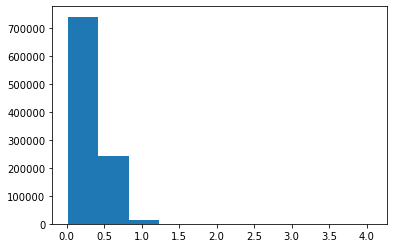

In [79]:
bootstrap_lambda_ratio(seed,unseed,1000000)

Pair of data to be bootstrapped and compared lambda2  scale: [49  4 18 26 29  9 16 12  2 22 10 34]
Pair of data to be bootstrapped and compared lambda2  scale: [ 61  33  62  45   0  30  82  10  20 358  63]
# of permutation: 1000000
Mean of Bootstrap Data 1: 7.105905878787879
2.55% percentile: 4.1439393939393945
97.5% percentile: 10.09848484848485
Mean of Bootstrap Data 2: 37.31247216363637
2.55% percentile: 10.354545454545454
97.5% percentile: 77.53636363636363


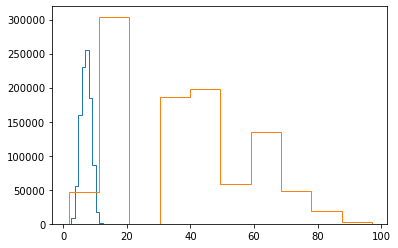

In [85]:
bootstrap_lambda_compare(seed,unseed,1000000)

Pair of data to be bootstrapped and compared lambda2  scale: [ 43   4  31  15 127]
Pair of data to be bootstrapped and compared lambda2  scale: [10  4  0  2  0  0  0  2  3  0  4  2  0  1  2]
# of permutation: 1000000
Mean of Bootstrap Data 1: 19.71393359999999
2.55% percentile: 4.0
97.5% percentile: 35.25
Mean of Bootstrap Data 2: 1.2059846809523815
2.55% percentile: 0.580952380952381
97.5% percentile: 2.0095238095238095


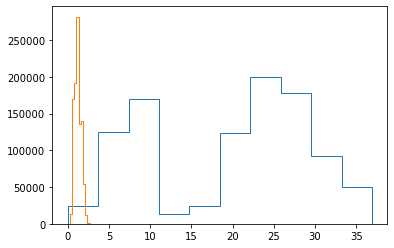

In [84]:
# Aufgabe 5.9

#Resampling of El Nino vs Non Elnino of precipitation of A3 of June Data.

elnino = np.array([43,4,31,15,127])
non_elnino = np.array([10,4,0,2,0,0,0,2,3,0,4,2,0,1,2])

bootstrap_lambda_compare(elnino,non_elnino,1000000)

Pair of data to be bootstrapped with lambda2 ratio scale: [ 43   4  31  15 127]
Pair of data to be bootstrapped with lambda2 ratio scale: [10  4  0  2  0  0  0  2  3  0  4  2  0  1  2]
# of permutation: 100000
Mean of Bootstrap: 18.445090289458978
2.55% percentile: 3.0179640718562877
97.5% percentile: 45.052325581395344


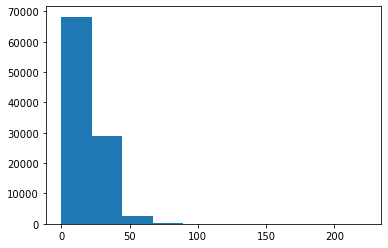

In [89]:

bootstrap_lambda_ratio(elnino,non_elnino,100000)

In [90]:

lambda_2(non_elnino)
print(lambda_2(elnino)/lambda_2(non_elnino))

16.76923076923077


In [ ]:
# The bootstrap_lambda_ratio is wrong
# First join the two batches
# Make permutation
# Separate the batches
# Calculate lambdas and ratios
# N-sample time....

In [ ]:
#https://datasciencechalktalk.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/